In [1]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline  

In [3]:
# Load saved model and vectorizer
logreg_model = joblib.load("discipline_classifier_logreg.pkl")
tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")

print("Model and vectorizer loaded successfully.")

Model and vectorizer loaded successfully.


In [5]:
import pandas as pd

# Load your new evaluation CSV
eval_data = pd.read_csv("Evaluation Dataset - 9 entries.csv")

# Preview
eval_data

,ID,Discipline,Abstract
0,1,CS,Proteins are the fundamental biological macrom...
1,2,CS,CompCert is the first commercially available o...
2,3,CS,Virtual and augmented reality (VR/AR) are expe...
3,4,IS,The implementation of eHealth systems with a t...
4,5,IS,The evolution of Enterprise Resource Planning ...
5,6,IS,In any business network for record transaction...
6,7,IT,"In the last decade, novel software architectur..."
7,8,IT,The latest wireless technology is developing s...
8,9,IT,In the emerging environment of high performanc...


In [7]:
label_map = {'CS': 0, 'IS': 1, 'IT': 2}
eval_data['True_Label'] = eval_data['Discipline'].map(label_map)
eval_data[['Discipline', 'True_Label']].head()

,Discipline,True_Label
0,CS,0
1,CS,0
2,CS,0
3,IS,1
4,IS,1


In [8]:
# Use the saved TF-IDF vectorizer to transform the abstract texts into feature vectors
X_eval = tfidf_vectorizer.transform(eval_data['Abstract'])

# Optional: Check the shape of the resulting feature matrix
print("TF-IDF matrix shape:", X_eval.shape)

TF-IDF matrix shape: (9, 2000)


In [9]:
# Predict the discipline labels using the trained Logistic Regression model
y_pred = logreg_model.predict(X_eval)

# Add predictions to your DataFrame
eval_data['Predicted_Label'] = y_pred

# View the actual vs predicted labels
eval_data[['Discipline', 'True_Label', 'Predicted_Label']]

,Discipline,True_Label,Predicted_Label
0,CS,0,0
1,CS,0,0
2,CS,0,0
3,IS,1,1
4,IS,1,1
5,IS,1,0
6,IT,2,2
7,IT,2,2
8,IT,2,2


Classification Report:

              precision    recall  f1-score   support

          CS       0.75      1.00      0.86         3
          IS       1.00      0.67      0.80         3
          IT       1.00      1.00      1.00         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



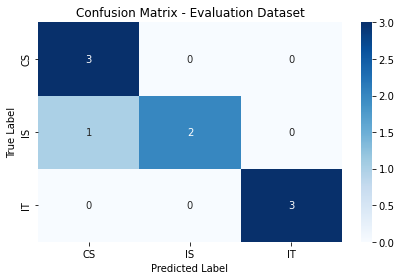

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report: detailed precision, recall, F1
print("Classification Report:\n")
print(classification_report(eval_data['True_Label'], y_pred, target_names=['CS', 'IS', 'IT']))

# Confusion matrix: 3x3 visual layout
cm = confusion_matrix(eval_data['True_Label'], y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['CS', 'IS', 'IT'],
            yticklabels=['CS', 'IS', 'IT'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Evaluation Dataset")
plt.tight_layout()
plt.show()

### 📊 Final Evaluation Summary – Discipline Classifier (Logistic Regression)

#### 🗂 Evaluation Dataset
- **Total entries**: 9 abstracts (3 CS, 3 IS, 3 IT)
- **Source**: `Evaluation Dataset - 9 entries.csv`
- Each abstract was selected from a unique subfield and methodology for generalization testing

#### 🧠 Model Evaluated
- **Model**: Logistic Regression (`discipline_classifier_logreg.pkl`)
- **Vectorizer**: TF-IDF (`tfidf_vectorizer.pkl`)
- **Training set**: 105 abstracts (35 per class)
- **Input features**: 2000-dimensional TF-IDF vectors

#### ✅ Insights
- Strong generalization on an unseen dataset with discipline, subfield, and methodology diversity
- Slight confusion between IS and CS—realistic in interdisciplinary research
- Confirms model readiness for next phase: **subfield + methodology classification**